<a href="https://colab.research.google.com/github/callaghan210-coder/Data-Science/blob/main/Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
## Context
Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

## Context
This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India

## Data fields
N - ratio of Nitrogen content in soil
P - ratio of Phosphorous content in soil
K - ratio of Potassium content in soil
temperature - temperature in degree Celsius
humidity - relative humidity in %
ph - ph value of the soil
rainfall - rainfall in mm

In [1]:
import pandas as pd
#load our dataset
df = pd.read_csv('/content/Crop_recommendation.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


# 1. Data Exploration

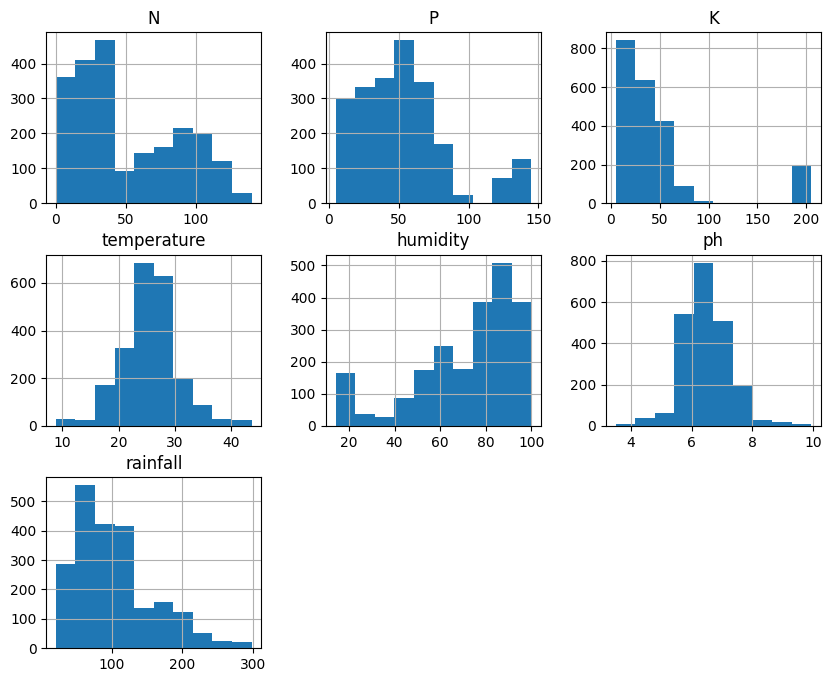

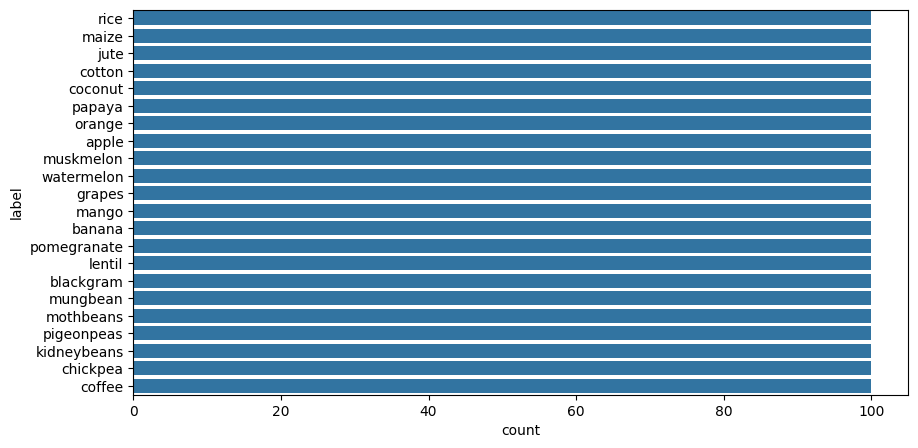

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for numeric columns
df.hist(figsize=(10,8))
plt.show()

# Plotting the count of each label
plt.figure(figsize=(10, 5))
sns.countplot(y=df['label'], order=df['label'].value_counts().index)
plt.show()


# 2. Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Convert the label column to numerical
df['label_encoded'] = le.fit_transform(df['label'])

# Show the first few rows
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


# 3. Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric columns
df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = scaler.fit_transform(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])

# Show the first few rows of the scaled data
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,rice,20
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,rice,20
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,rice,20
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,rice,20
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,rice,20


# 4. Splitting the Data

In [7]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and label (y)
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label_encoded']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (1760, 7)
Test data shape: (440, 7)


# 5. Train a Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


# 6. Evaluate the Model

In [9]:
# Check accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Test Set Accuracy: 99.32%
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.0

# 7. Save the Model

In [10]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'crop_recommendation_model.pkl')

print("Model saved as crop_recommendation_model.pkl")


Model saved as crop_recommendation_model.pkl


# 8. Load The Model and Make Predictions

In [11]:
# Load the trained model
loaded_model = joblib.load('crop_recommendation_model.pkl')

# Make a prediction using the loaded model
sample_data = [[90, 42, 43, 20.879, 82.002, 6.502, 202.935]]  # Example input
prediction = loaded_model.predict(sample_data)
print("Recommended crop:", le.inverse_transform(prediction))


Recommended crop: ['apple']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
